# Principal Component Analysis
The goal of this question is to build a conceptual understanding of dimensionality reduction using PCA and implement it on a toy dataset. You’ll only have to use numpy and matplotlib for this question.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
# (a) Load data (features)
def load_data():
    data=np.load('q3-data\\features.npy') 
    
    for i in range(len(data[0])):
        
        data[:,i]=(data[:,i]-(data[:,i].mean()))/(data[:,i].std())
        
    return data

X=load_data()


In [38]:
# (b) Perform eigen decomposition and return eigen pairs in desecending order of eigen values
def eigendecomp(X):   
    mu = np.mean(X, axis=0)
    n=X.shape[0]
    cov = (X - mu).T.dot((X- mu)) / (n-1)
    
    eigenValues, eigenVectors = np.linalg.eig(cov)
    eigenVectors=eigenVectors.T
    
    idx = eigenValues.argsort()[::-1]   
    sorted_eig_vals = eigenValues[idx]
    sorted_eig_vecs = eigenVectors[:, idx]
    
    return (sorted_eig_vals, sorted_eig_vecs)
eig_values, eig_vectors=eigendecomp(X)
print('The eigen values in descending order are:',eig_values)

The eigen values in descending order are: [ 4.743e+00  2.296e+00  7.769e-01  2.042e-01  3.377e-02  1.019e-16
 -1.048e-17 -2.066e-16]


In [42]:
# (c) Evaluate using variance_explained as the metric
def eval():
    f=[]
    s=0
    l=[]
    
    eig_values, eig_vectors=eigendecomp(X)
    k=len(eig_values)
    sum_eigenvalues = sum(eig_values)
    for i in eig_values:
        frac_variance = (i / sum_eigenvalues)*100 
        f.append(frac_variance)
    for i in f:
        s=s+i
        l.append(s)
    v=np.asarray(f)
    cum_var=np.asarray(l)  
    dim=np.arange(1,k+1, 1)
    a=np.hstack((dim.reshape(-1,1), eig_values.reshape(-1,1)))
    b=['dimension', 'eigen values']
    b=np.asarray(b)
    m1=np.row_stack((b,a))
    a=np.hstack((dim.reshape(-1,1), cum_var.reshape(-1,1)))
    b=['dimension',  'variance as a function of k']
    b=np.asarray(b)
    m2=np.row_stack((b,a))
    print(m1)
    print(m2)
    return(m1,m2)




In [45]:
# (d) Visualize after projecting to 2-D space
def viz():
    mat = np.hstack((eig_vectors[0].reshape(-1,1),
                      eig_vectors[1].reshape(-1,1)))
    
   
    Y=X.dot(mat)
    #print(Y)
    labels=np.load('q3-data\\labels.npy') 
    
    plt.scatter(Y[labels==0][:,0], Y[labels==0][:,1])
    plt.scatter(Y[labels==1][:,0], Y[labels==1][:,1])
    plt.scatter(Y[labels==2][:,0], Y[labels==2][:,1])
    plt.legend(['0','1','2' ])
    plt.show()
    


[['dimension' 'eigen values']
 ['1.0' '4.742989609365717']
 ['2.0' '2.2958530862227144']
 ['3.0' '0.7769105123670556']
 ['4.0' '0.20417290116163914']
 ['5.0' '0.03376516605065367']
 ['6.0' '1.0190690690125968e-16']
 ['7.0' '-1.047998000937628e-17']
 ['8.0' '-2.0655424267425319e-16']]
[['dimension' 'variance as a function of k']
 ['1.0' '58.8921209829577']
 ['2.0' '87.3989634702231']
 ['3.0' '97.04560233211404']
 ['4.0' '99.5807491882044']
 ['5.0' '100.00000000000001']
 ['6.0' '100.00000000000001']
 ['7.0' '100.00000000000001']
 ['8.0' '100.00000000000001']]


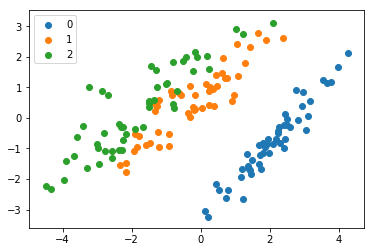

In [46]:
def main():

    eval()
    viz()

if __name__ == "__main__":
    main()

k=3 is the dimensionality to chooses as 97.04 percent of variance is accounted for and it is easy to project it 3d space.
However if you want 100 percent variance whilst compromising on visual representation, k=5 should be chosen.

(e1): If the number of features is 1000 and the number of data points is 10, what will be the dimension of your covariance matrix? Can you suggest what can be changed to improve the performance?

![PCA -m](pca -m.jpg)>
